# ** A Practical Introduction To Support Vector Machines in Python**

Lets use Pythons Scikit Learn Library to generate and visualize some random points.

In [184]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
model= svm.SVC(kernel='linear')

Lets generate some blobs.

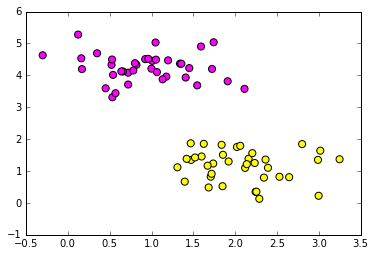

In [311]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=75, centers=2,
                  random_state=0, cluster_std=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');

A number of straight lines can be drawn(actually, infinite) to seperate the two set of blobs.

However, common sense dictates that if we mazimise the margin between the closest two points of the two set of blobs, that will be the best soution and will tend to overfit less.Hence we use, what is called a **Support Vector Classifier**

The seperator is (n-1) dimension hyperplane[1] where n is the dimensionality of the data.In this case, since the data is 2 dimension, the seperator is  single dimension (a simple line).

We could seperate higher dimension data however it is not possible to visualize the seperator hyperplane.

Another advantage of SVC and SVM is they are do not change at all due to outliers.Since, the hyperplane is only determined by the points on the margin and on the boundary of the margin(these are called the support vectors, hence naming the algorithm)

Here is the solution.

[1] - In geometry a hyperplane is a subspace of one dimension less than its ambient space. If a space is 3-dimensional then its hyperplanes are the 2-dimensional planes, while if the space is 2-dimensional, its hyperplanes are the 1-dimensional lines.

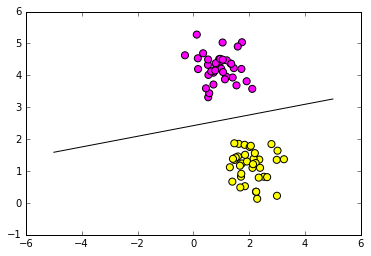

In [312]:
mod= svm.SVC(kernel='linear').fit(X,y)


w = mod.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (mod.intercept_[0]) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.plot(xx, yy, 'k-')

However, what if the data is not linearly seperable i.e a straight line cannot seperate the data as given below.

We could use a polynomial solution to solve this, however polynomial degree solutions tend to not generalize the data too well and can overfit.

Here we introduce, Support Vector Machines.SVM are an expansion of SVC's.

The original SVM algorithm was invented by Vladimir N. Vapnik and Alexey Ya. Chervonenkis in 1963(of the VC Dimension fame, if the word makes sense to you)

SVM transform the feature space into higher dimensions (simply add X^2 terms and so on) where the data is linearly seperable and solves the problem there.However this is computationally very expensive and can even be impossible to solve in an infinite dimension space.

Hence, SVM use the "**Kernel Trick**", solving a kernel at a higher dimension,which is fairly technical, simply spits out a support vector classifier in the higher dimension space rather that the original space.This result is called a Support Vector Machine.

The most common kernel is called a Radial Kernel.

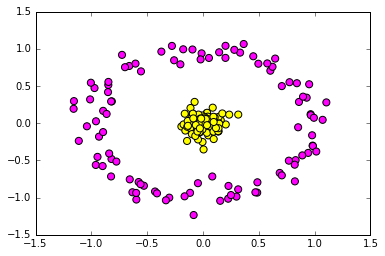

In [317]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(200, factor=.01, noise=.1)

clf = svm.SVC(kernel='rbf').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')


In [318]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

We can see the seperator hyperplane line along with the dotted margin

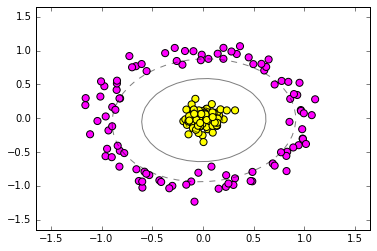

In [319]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

Lets take the iris dataset and fit a SVM model and also try to tune its parameters.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


Iris Setosa


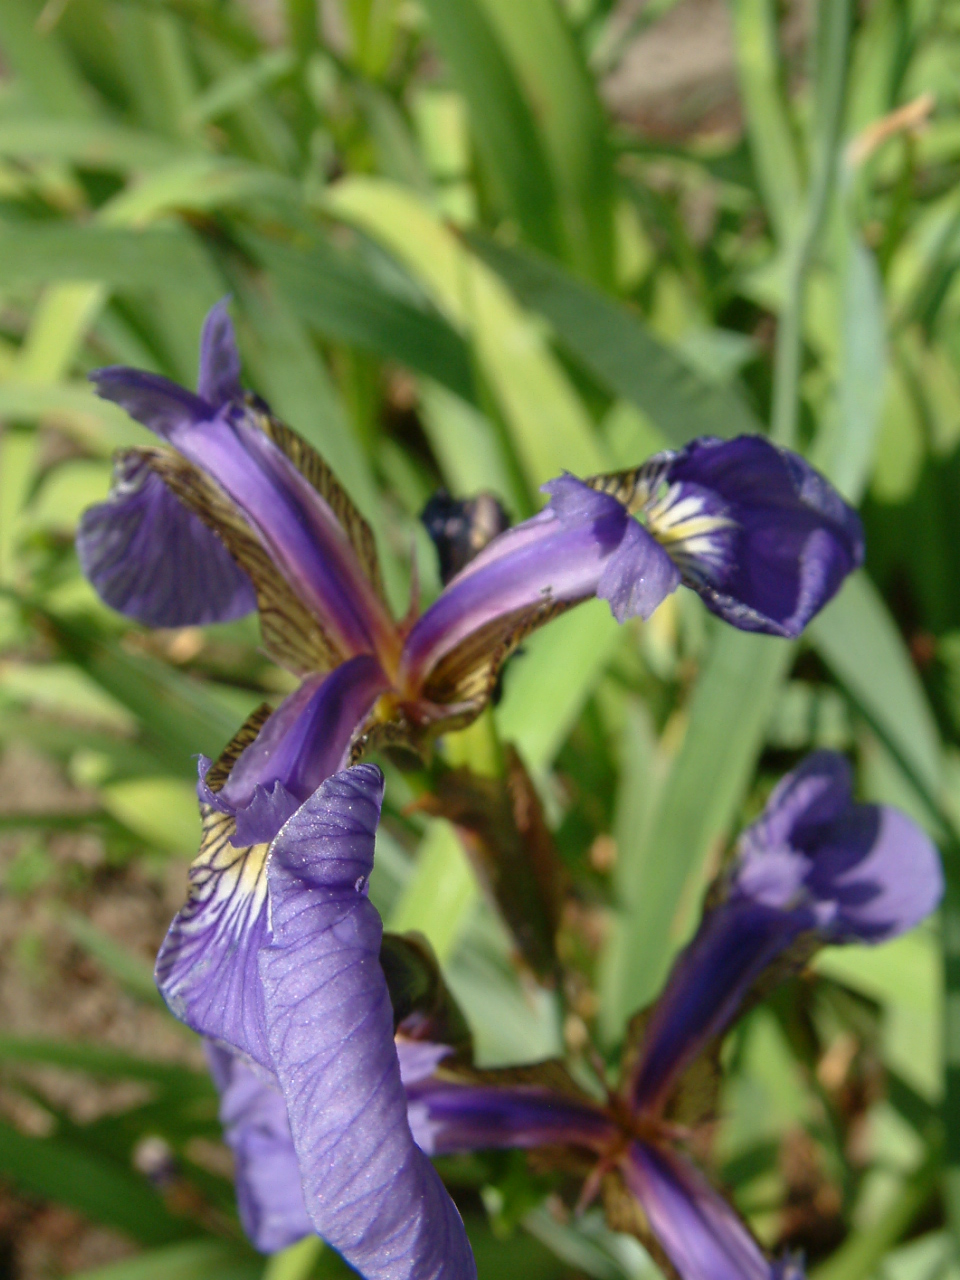

In [360]:
from IPython.display import Image
from IPython.core.display import HTML
print "Iris Setosa"
Image(filename ="setosa.jpg", width=500, height=300)



In [356]:
print"Iris Versicolor"
Image(url= "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg",width = 600, height = 400)


Iris Versicolor


In [358]:
print "Iris Virginica"
Image(url= "https://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg",width = 600, height = 400)


Iris Virginica


Lets fit an linear SVM on it using the svm.LinearSVC class provided by scikit learn.

Learn more here - http://scikit-learn.org/stable/modules/svm.html

In [361]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target
model = svm.LinearSVC()

In [305]:
model.fit(X,y)
model.score(X,y)

0.80000000000000004

Lets plot the decision boundary of the SVC

In [307]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

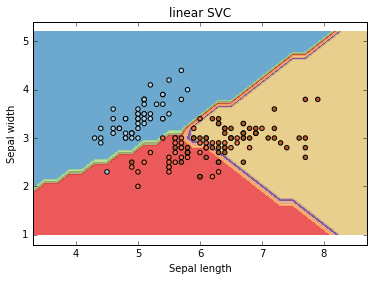

In [308]:
def plot_fn(mod,tit):
    plt.subplot(1, 1, 1)
    Z = mod.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(tit)
    plt.show()

plot_fn(model,"linear SVC")

The SVM does a good job of classifying the flowers as shown above.

Gamma is the parameter of the radial basis function(kernel) and  defines how far the influence of a single training example reaches.

Lets try out different gamma values.

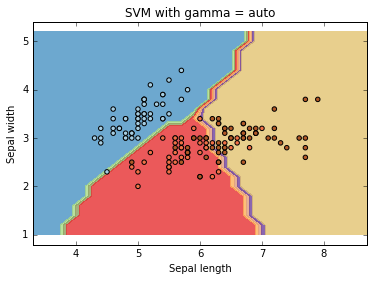

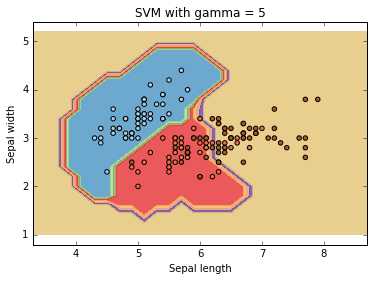

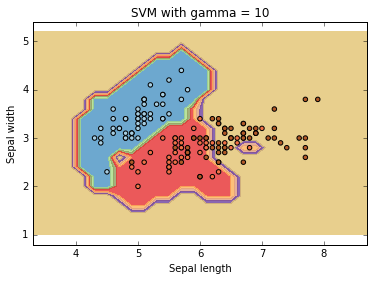

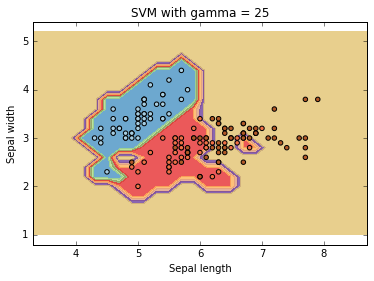

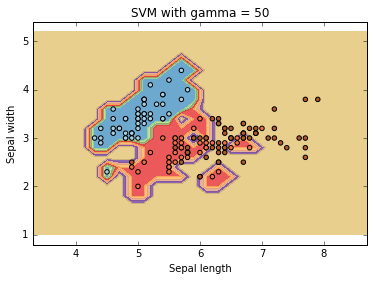

In [74]:
for g in ('auto', 5, 10, 25, 50):
    mod2 = svm.SVC(kernel = 'rbf', gamma = g)
    mod2.fit(X,y)
    plot_fn(mod2,"SVM with gamma = "+ str(g))


The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Lets try out different C values.

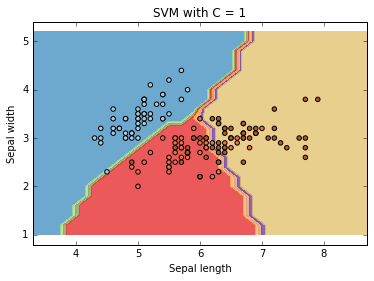

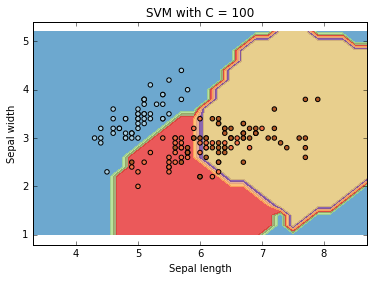

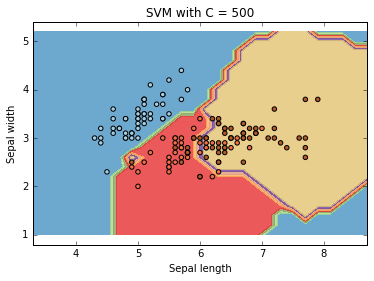

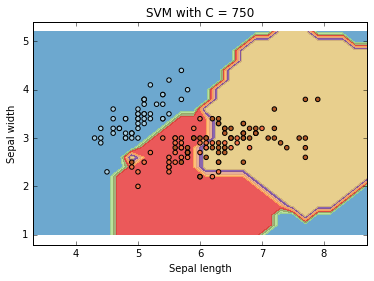

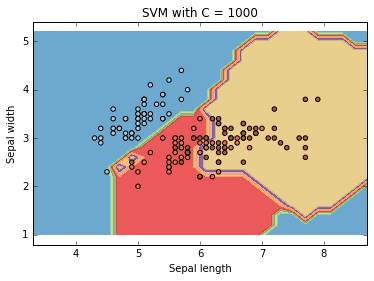

In [95]:
for c in (1,100,500,1000):
    mod2 = svm.SVC(kernel = 'rbf', C=c)
    mod2.fit(X,y)
    plot_fn(mod2,"SVM with C = "+ str(c))

The best way to choose C value is through K-fold Cross validation.

K-fold cross validation is simply diving the data into k parts, where k-1 parts are used to train the model while the kth one is use to test it.This is repeated k times and the average score is taken.

In [102]:
from sklearn.cross_validation import KFold

In [79]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(
       X, y, test_size=0.4, random_state=0)

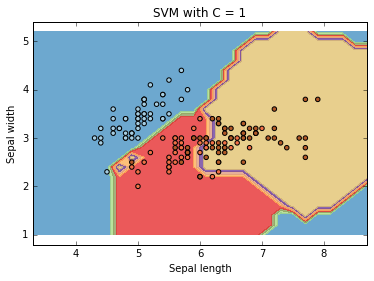

The accuracy on the test set =  0.7


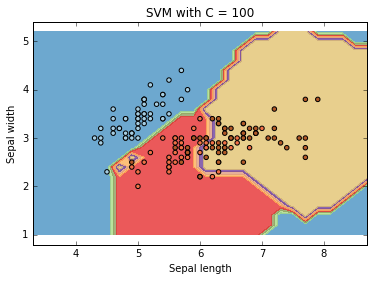

The accuracy on the test set =  0.716666666667


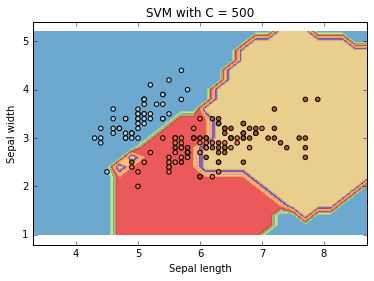

The accuracy on the test set =  0.683333333333


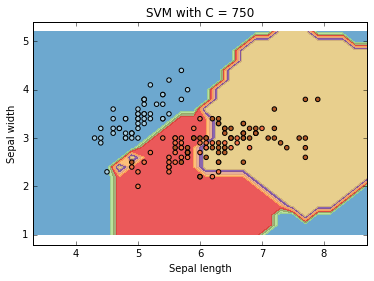

The accuracy on the test set =  0.683333333333


In [99]:
for c in (1,100,500,750):
    mod3 = svm.SVC(kernel = 'rbf', C=c).fit(X_train, y_train)
    plot_fn(mod2,"SVM with C = "+ str(c))
    print "The accuracy on the test set = ", mod3.score(X_test,y_test)
